## Dataset generation from deformable mirror

A Parabolic GRIN fiber or a Step-Index fiber can be used

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber
from mmfsim.datasets import (
    SimulatedHyperspectralSpeckleOutputDataset,
    SimulatedHyperspectralGrinSpeckleOutputDataset,
    SimulatedHyperspectralStepIndexSpeckleOutputDataset,
)

### Setup

Set the computation grid and the fiber characteristics

In [25]:
wavelengths: list = [900e-9, 1064e-9, 1550e-9]
fiber_type: str = 'grin' # 'grin' or 'step'
grid_settings: dict = {'pixel_size': 1e-6, 'pixel_numbers': (64, 64)}
fiber_settings: dict = {'radius': 25e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'n2': 1.44839}
dataset_settings: dict = {'length': 30, 'degen': True, 'phases_dim': (4,4)}
fourier_settings: dict = {'pad': 1}
export_settings: dict = {'return_output_fields': False, 'add_exp_noise': False, 'noise_func': np.max, 'file_type': 'matlab'}

### Dataset generation

Generate the grid and the fiber

In [26]:
grid = Grid(**grid_settings)

if fiber_type.lower() in ['grin']:
    fiber_class = GrinFiber
    dset_class = SimulatedHyperspectralGrinSpeckleOutputDataset
elif fiber_type.lower() in ['step', 'si']:
    fiber_class = StepIndexFiber
    dset_class = SimulatedHyperspectralStepIndexSpeckleOutputDataset
else:
    raise ValueError(f"Unknown fiber type.")

fibers = []
for wvl in wavelengths:
    fiber_settings['wavelength'] = wvl
    fibers.append(fiber_class(**fiber_settings))

print(fibers[1])

GrinFiber instance with:
  - Radius: 25.0 um
  - Core index: 1.465
  - Cladding index: 1.44839
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.220
  - Number of guided LP modes: 65
  - Number of guided LP modes (counting degenerates): 115
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[1.465      0.         0.         1.        ]
 [1.46398289 1.         0.         2.        ]
 [1.46296578 2.         1.         1.        ]
 [1.46296578 2.         0.         3.        ]
 [1.46194867 3.         1.         2.        ]
 [1.46194867 3.         0.         4.        ]
 [1.46093156 4.         2.         1.        ]
 [1.46093156 4.         1.         3.        ]
 [1.46093156 4.         0.         5.        ]
 [1.45991445 5.         2.         2.        ]]


Compute and store the modes for a much faster dataset generation, plot one for checking extent

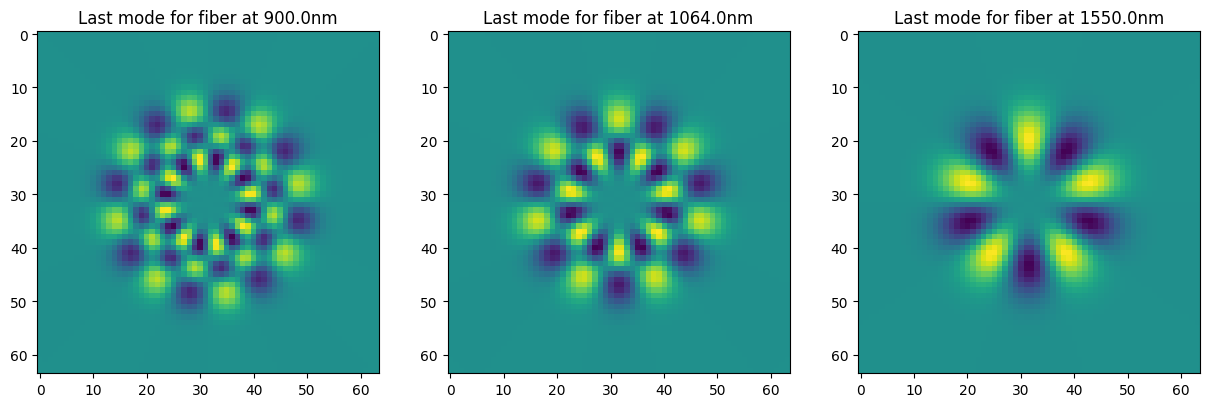

In [27]:
plt.figure(figsize=(15, 5))

for i, fiber in enumerate(fibers):
    fiber.compute_modes_fields(grid)

    plt.subplot(1, len(fibers), i + 1)
    plt.imshow(fiber._modes[:,:,1,-1])
    plt.title(f"Last mode for fiber at {wavelengths[i] * 1e9:.1f}nm")

Compute dataset

In [55]:
dset = dset_class(
    fibers, 
    grid,
    N_modes=[fiber._N_modes_degen for fiber in fibers],
    length=dataset_settings['length'],
    degen=dataset_settings['degen'],
)

dset.compute(phases_dim=(4,4))
# dset.compute_from_transfer_matrix(phases_dim=dataset_settings['phases_dim'])

Computed TM row 1/16
Computed TM row 2/16
Computed TM row 3/16
Computed TM row 4/16
Computed TM row 5/16
Computed TM row 6/16
Computed TM row 7/16
Computed TM row 8/16
Computed TM row 9/16
Computed TM row 10/16
Computed TM row 11/16
Computed TM row 12/16
Computed TM row 13/16
Computed TM row 14/16
Computed TM row 15/16
Computed TM row 16/16
Computed TM row 1/16
Computed TM row 2/16
Computed TM row 3/16
Computed TM row 4/16
Computed TM row 5/16
Computed TM row 6/16
Computed TM row 7/16
Computed TM row 8/16
Computed TM row 9/16
Computed TM row 10/16
Computed TM row 11/16
Computed TM row 12/16
Computed TM row 13/16
Computed TM row 14/16
Computed TM row 15/16
Computed TM row 16/16
Computed TM row 1/16
Computed TM row 2/16
Computed TM row 3/16
Computed TM row 4/16
Computed TM row 5/16
Computed TM row 6/16
Computed TM row 7/16
Computed TM row 8/16
Computed TM row 9/16
Computed TM row 10/16
Computed TM row 11/16
Computed TM row 12/16
Computed TM row 13/16
Computed TM row 14/16
Computed TM row

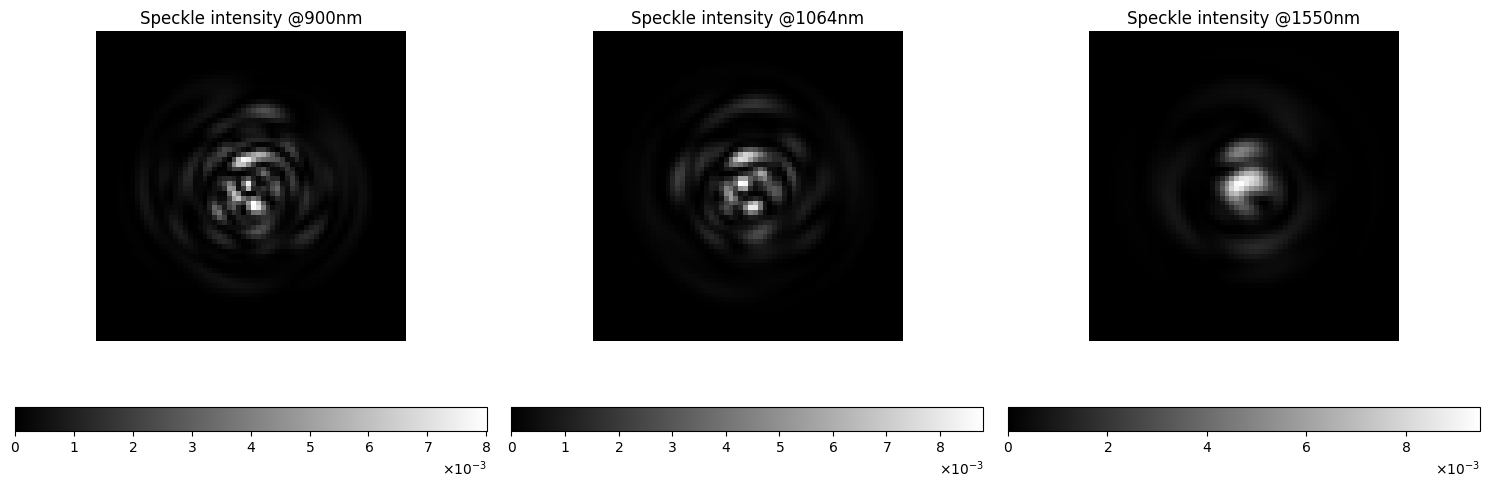

In [57]:
dset.plot_example(as_rgb=False)

### Dataset checking and export

Display a random draw from the dataset as a check

Export it if it looks ok

In [59]:
dset.export(name="test.mat")

Dataset saved: .\test.mat.mat
